In [37]:
import pandas as pd
import numpy as np
#sklearn.preprocessing의 scale: 스케일 조정 패키지
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [38]:
#sklearn.ensemble의 GradientBoostingClassifier:분류 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
ds_hmeq = pd.read_csv('./Downloads/week4day1/HMEQ.csv',encoding='CP949',engine='python')
ds_hmeq.head()
#타겟이 이산형

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [40]:
#결측치 확인
ds_hmeq.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [43]:
#fillna : 결측치 채우는 함수
ds_hmeq["JOB"].fillna("Other", inplace=True)
#아예 비면 빠지므로 아더 입력
ds_hmeq.fillna(ds_hmeq.mean(), inplace=True)
#연속형 데이터에 평균값 입력

In [45]:
ds_hmeq_dummy=pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [46]:
np.random.seed(seed=1234)
msk=np.random.rand(ds_hmeq_dummy.shape[0]) <0.7
ds_hmeq_train=ds_hmeq_dummy[msk]
ds_hmeq_test=ds_hmeq_dummy[~msk]

ds_hmeq_train_y=ds_hmeq_train["BAD"]
ds_hmeq_train_x=ds_hmeq_train.drop("BAD", axis=1, inplace=False)
ds_hmeq_test_y=ds_hmeq_test["BAD"]
ds_hmeq_test_x=ds_hmeq_test.drop("BAD", axis=1, inplace=False)

print("train data X size : {}".format(ds_hmeq_train_x.shape))
print("train data Y size : {}".format(ds_hmeq_train_y.shape))
print("test data X size : {}".format(ds_hmeq_test_x.shape))
print("test data Y size : {}".format(ds_hmeq_test_y.shape))

train data X size : (2604, 18)
train data Y size : (2604,)
test data X size : (1144, 18)
test data Y size : (1144,)


In [47]:
gb_uncustomized=GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(ds_hmeq_train_x, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))



Accuracy on training set: 0.959
Accuracy on test set: 0.944


In [32]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [33]:
ds_hmeq_train_x_scaled=scale(ds_hmeq_train_x, axis=0)
ds_hmeq_test_x_scaled=scale(ds_hmeq_test_x, axis=0)
pd.DataFrame(ds_hmeq_train_x_scaled, columns=ds_hmeq_train_x.columns).head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
2,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
3,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
4,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808


In [44]:
gb_scaled=GradientBoostingClassifier(random_state=1234)
gb_scaled.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(gb_scaled.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_scaled.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y)))

Accuracy on training set: 0.959
Accuracy on test set: 0.943


In [19]:
train_accuracy=[]
test_accuracy=[]

for lr in range(1, 100, 5):
    gb1=GradientBoostingClassifier(learning_rate=lr/100, random_state=1234)
    gb1.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(gb1.score(ds_hmeq_train_x,ds_hmeq_train_y))
    test_accuracy.append(gb1.score(ds_hmeq_test_x,ds_hmeq_test_y))
    
ds_accuracy1=pd.DataFrame()
ds_accuracy1["LearningRate"]=[lr/100 for lr in range(1, 100, 5)]
ds_accuracy1["TrainAccuracy"]=train_accuracy
ds_accuracy1["TestAccuracy"]=test_accuracy

In [21]:
ds_accuracy1.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.01,0.093,0.09
1,0.06,0.093,0.09
2,0.11,0.093,0.09
3,0.16,0.093,0.09
4,0.21,0.093,0.09
5,0.26,0.093,0.09
6,0.31,0.093,0.09
7,0.36,0.093,0.09
8,0.41,0.093,0.09
9,0.46,0.093,0.09


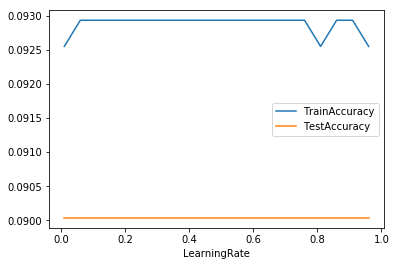

In [23]:
ds_accuracy1.set_index("LearningRate", inplace=False).plot.line()